In [ ]:
#Vorbereitung
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

df = pd.read_csv("PremierLeague.csv", sep=";")
df.columns = df.columns.str.strip()  


def get_result(row):
    if row["FullTimeHomeTeamGoals"] > row["FullTimeAwayTeamGoals"]:
        return "HomeWin"
    elif row["FullTimeHomeTeamGoals"] < row["FullTimeAwayTeamGoals"]:
        return "AwayWin"
    else:
        return "Draw"

df["Result"] = df.apply(get_result, axis=1)

le = LabelEncoder()
df["Home_enc"] = le.fit_transform(df["HomeTeam"])
df["Away_enc"] = le.fit_transform(df["AwayTeam"])
df["Result_enc"] = df["Result"].map({"HomeWin": 0, "Draw": 1, "AwayWin": 2})

df["HomeGoalsSoFar"] = df.groupby("HomeTeam")["FullTimeHomeTeamGoals"].cumsum().shift().fillna(0)
df["AwayGoalsSoFar"] = df.groupby("AwayTeam")["FullTimeAwayTeamGoals"].cumsum().shift().fillna(0)

df["Heimvorteil"] = 1

X = df[["Home_enc", "Away_enc", "HomeGoalsSoFar", "AwayGoalsSoFar", "Heimvorteil"]]
y = df["Result_enc"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

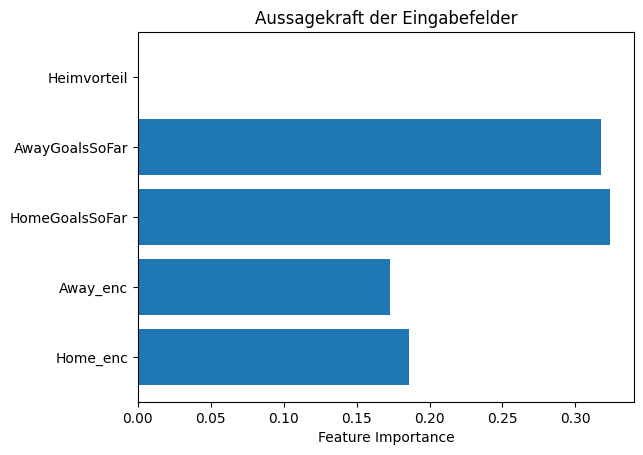

Home_enc: 0.186
Away_enc: 0.173
HomeGoalsSoFar: 0.324
AwayGoalsSoFar: 0.317
Heimvorteil: 0.000


In [9]:
# 4.1
feature_importance = model.feature_importances_
features = X.columns

plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Aussagekraft der Eingabefelder")
plt.show()

for feat, imp in zip(features, feature_importance):
    print(f"{feat}: {imp:.3f}")

In [11]:
# 4.2
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.455


In [10]:
# 4.3
cm = confusion_matrix(y_test, y_pred)
print("Konfusionsmatrix:")
print(cm)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision (macro): {precision:.3f}")
print(f"Recall (macro): {recall:.3f}")

Konfusionsmatrix:
[[368  87  97]
 [181  49  61]
 [170  61 132]]
Precision (macro): 0.405
Recall (macro): 0.400


4.4
Bewertung: 
Mit einer Genauigkeit von 45 % ist mein Modell bei der Vorhersage von Fussballspielen relativ gut dabei. Man sieht dabei, dass die bisherigen Tore sowie Teamkonstellationen einen grossen Einfluss auf die Vorhersagen haben. Percision und Recall liegen im mittleren Bereich, was auf eine gute Vorhersagequalität hinweist. Fehlende Informationen wie Formkurve, verletzte Spieler oder Tabellenstand könnten die Aussagekräftigkeit beschränken.